# Group 43 Presentation Notebook
## Introduction:

When our group first came together and brainstormed what exactly we should measure the neighborhoods by in order to select the "best," we all agreed that safety is one of, if not the most, important factors for ensuring a high quality of life. From there, we decided to use datasets that all correlated to neighborhood safety. Safety is a relatively broad subject, so our datasets pertaining to arrests, firearm seizures, and reported fires all connect back to safety while representing a diverse range of statistics. 

### Metrics: 

The metrics our group used to determine the best neighborhood in Pittsburgh were the number of reported fires, arrests, and firearm seizures uploaded courtesy of the WPRDC. 

## Sloane's Work:


### Intro:

In my opinion, safety is one of the most important factors in deciding the worth and quality of an area or neighborhood. Having lived in around ten Pittsburgh neighborhoods throughout my life, I've lived in and around both "bad" and "good" areas. I've heard countless stories about certain neighborhoods within Pittsburgh, been told what parts of town to avoid, and have even felt the lingering effects of high neighborhood crime rates within my life personally. Keeping these experiences in mind, I wanted to see which neighborhoods really are the safest based on how many arrests have taken place in each over the last 5 years. Thus, I have selected the dataset "Pittsburgh Police Arrest Data" for analysis. I chose this dataset as arrest rates can be a good indicator of crime and safety levels within an area.

### Dataset:

The dataset I've selected for analysis is "Pittsburgh Police Arrest Data." This dataset represents the number of police arrests within
different neighborhoods across Pittsburgh starting on August 23, 2016 until the current day. It includes over 50,000 arrest data entries
provided by the Pittsburgh Bureau of Police. I chose this dataset in particular as arrest rates often correlate to the amount of crime
committed within an area, and thus they are good indicators of an area's general level of safety.

I plan to use this dataset to determine the amount of arrests that have occurred within Pittsburgh neighborhoods over the last five years as well as which communities have logged the least amount of criminal arrests. I will then find the arrest rates of each neighborhood by using their arrest amounts as well as their populations. The neighborhoods' arrest rates will then be used to determine the overall level of safety within each area.

### Metric:

During my analysis, I will be looking for the Pittsburgh neighborhoods with not only the lowest amount of reported arrests, but the lowest overall arrest rate based on each neighborhood's estimated population.

In [5]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mpl

crimedata = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
crimedata.head(10) # First ten rows of the dataset, test to see if the data loads

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


In [3]:
crimedata['INCIDENTNEIGHBORHOOD'].unique() # This allows me to see which neighborhoods are accounted for in the dataset
# I will use this data in order to construct my arrest rate Excel sheet

array(['Bloomfield', 'Outside City', 'Westwood', 'East Allegheny',
       'Crafton Heights', 'Greenfield', 'Brookline', 'Regent Square',
       'East Liberty', nan, 'East Hills', 'Carrick', 'Allegheny Center',
       'South Side Flats', 'Sheraden', 'East Carnegie',
       'Golden Triangle/Civic Arena', 'Point Breeze North', 'Perry South',
       'Allentown', 'North Shore', 'Marshall-Shadeland',
       'Central Oakland', 'Middle Hill', 'Strip District',
       'Lincoln-Lemington-Belmar', 'Central Northside',
       'Troy Hill-Herrs Island', 'Highland Park', 'Homewood North',
       'Northview Heights', 'Brighton Heights', 'Hazelwood',
       'Perry North', 'Bedford Dwellings', 'Elliott', 'Beechview',
       'Fineview', 'Glen Hazel', 'Spring Hill-City View', 'Bluff',
       'Manchester', 'Homewood West', 'Outside County', 'Point Breeze',
       'Homewood South', 'Squirrel Hill South', 'Terrace Village',
       'Upper Lawrenceville', 'Arlington', 'South Side Slopes',
       'Lower Lawrenc

In [4]:
len(crimedata['INCIDENTNEIGHBORHOOD'].unique()) # This shows the number of neighborhoods represented in the dataset
# I am doing this in order to have a total number of neighborhoods to refer to when constructing my arrest rate sheet

99

In [5]:
crimedata['INCIDENTNEIGHBORHOOD'].value_counts() 
# This shows how many entries were logged for each neighborhood within the dataset
# It shows the five neighborhoods with the most arrest entries and the five with the least

Central Business District    3181
South Side Flats             2698
Carrick                      1853
East Allegheny               1725
Homewood South               1683
                             ... 
Regent Square                  27
Central Northside              23
Mt. Oliver Boro                17
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

In [6]:
query_mask = crimedata['INCIDENTNEIGHBORHOOD'] == "Mt. Oliver Neighborhood"
olivercrime = crimedata[query_mask]
olivercrime['INCIDENTNEIGHBORHOOD'].value_counts() 
# Test to make sure data is accurate
# It does only have 2 entries, so the dataset value count data is accurate.

Mt. Oliver Neighborhood    2
Name: INCIDENTNEIGHBORHOOD, dtype: int64

Text(0, 0.5, 'Arrests (2016-2021)')

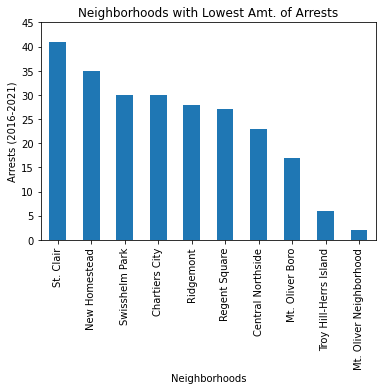

In [8]:
vc = crimedata['INCIDENTNEIGHBORHOOD'].value_counts() 
vc.tail(10).plot(kind="bar", ylim=[0,45])
mpl.title("Neighborhoods with Lowest Amt. of Arrests")
mpl.xlabel("Neighborhoods")
mpl.ylabel("Arrests (2016-2021)")
# Here I am creating a bar graph in order to display the ten neighborhoods with the lowest amounts of arrests
# This bar graph displays the ten neighborhoods with the lowest reported amounts of arrests

In [9]:
for idx, name in enumerate(crimedata['INCIDENTNEIGHBORHOOD'].value_counts().index.tolist()):
    print('Neighborhood :', name)
    print('Arrests :', crimedata['INCIDENTNEIGHBORHOOD'].value_counts()[idx])

# Here I am looping through the dataset in order to display every neighborhood as well as their arrest amounts
# I will use this data to construct a new csv file that will allow me to determine the crime rates of each neighborhood based on population

Neighborhood : Central Business District
Arrests : 3181
Neighborhood : South Side Flats
Arrests : 2698
Neighborhood : Carrick
Arrests : 1853
Neighborhood : East Allegheny
Arrests : 1725
Neighborhood : Homewood South
Arrests : 1683
Neighborhood : Homewood North
Arrests : 1552
Neighborhood : East Liberty
Arrests : 1444
Neighborhood : Marshall-Shadeland
Arrests : 1201
Neighborhood : Bluff
Arrests : 1164
Neighborhood : Mount Washington
Arrests : 1127
Neighborhood : Knoxville
Arrests : 1067
Neighborhood : Hazelwood
Arrests : 1065
Neighborhood : Brookline
Arrests : 1038
Neighborhood : Lincoln-Lemington-Belmar
Arrests : 1015
Neighborhood : Sheraden
Arrests : 1013
Neighborhood : Beechview
Arrests : 982
Neighborhood : Allegheny Center
Arrests : 972
Neighborhood : East Hills
Arrests : 905
Neighborhood : Brighton Heights
Arrests : 882
Neighborhood : Perry South
Arrests : 857
Neighborhood : Bloomfield
Arrests : 800
Neighborhood : Shadyside
Arrests : 775
Neighborhood : Allentown
Arrests : 769
Neigh

In [10]:
popdata = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
popdata.head(10) # First ten rows of the dataset, test to see if the data loads
# Here I am using a different dataset from the WPRDC in order to extract each neighborhood's population

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000
5,Banksville,6,3858.0,581.107563
6,Bedford Dwellings,7,1349.0,180.000000
7,Beechview,8,8078.0,719.658252
8,Beltzhoover,9,1702.0,343.072879
9,Bloomfield,10,8669.0,491.348145


In [11]:
popdata["Estimate; Total"].sum() # This is the total amount of people that lived in Pittsburgh as of 2015
# Test to make sure this dataset accurately represents the total Pittsburgh population
# 309327 is very close to the current Pittsburgh population, so I am able to use this data

309327.0

In [12]:
popcrime = pd.read_csv("https://raw.githubusercontent.com/sloanemccensky/Group-43-Final-Project/main/populationsforproject.csv")
popcrime.head(10)
# This displays the first 10 rows of an Excel graph I made that shows each neighborhood's number of arrests and estimated population

,Arrests,Population,Rate
0,3181,4060,0.783498
1,2698,6292,0.428798
2,1853,10122,0.183067
3,1725,2095,0.823389
4,1683,2276,0.739455
5,1552,3371,0.460398
6,1444,5869,0.246039
7,1201,6043,0.198742
8,1164,6294,0.184938
9,1127,8743,0.128903


In [13]:
popcrime.nsmallest(10, ['Rate'])
# Here I've located the ten neighborhoods with the lowest crime rates
# In order from lowest to highest, they are: Troy Hill-Herrs Island, Mt. Oliver Neighborhood, Central Northside,
# West End, South Shore, Squirrel Hill North, Golden Triangle, Swisshelm Park, Regent Square, and Mt. Oliver Boro

,Arrests,Population,Rate
96,6,2283,0.002628
97,2,601,0.003328
94,23,2892,0.007953
60,217,17704,0.012257
54,239,16545,0.014445
61,216,11336,0.019054
82,83,4060,0.020443
91,30,1345,0.022305
93,27,1033,0.026137
95,17,598,0.028428


### Conclusion:


According to my analysis of arrest rates in each Pittsburgh neighborhood, Troy Hill-Herrs Island came out on top with an arrest rate of 262.8 arrests per 100,000 people. I reached this conclusion by first figuring out the numbers of reported arrests from each neighborhood from my original dataset. Then, using this data along with another WPRDC dataset detailing the 2015 populations of each neighborhood, I created my own Excel sheet in order to find the exact arrest rates of each neighborhood. From there, I concluded that Troy Hill-Herrs Island had the lowest and best arrest rate compared to every other neighborhood analyzed. Even being a Pittsburgh native, I have never visited Troy Hill so this conclusion was somewhat surprising. Some other close contenders were Mt. Olvier Neighborhood, Central Northside, West End, and South Shore.

#### Limitations:

In terms of limitations, a low amount of arrests does not always correlate to high safety levels within a neighborhood. There are a number of factors that could affect the validity of the conclusions I came to. Some Pittsburgh neighborhoods may be policed at a higher rate compared to others, or the WPRDC's arrest data may not be completely up to date for every neighborhood logged in the dataset. Even then, although low arrest rates do not always mean that an area is inherently safer than others, they can relate to less crimes committed within an area overall. I do believe that, after living in Pittsburgh for 18 years and experiencing many of these enighborhoods firsthand, areas with lower arrest rates are superior to those with high rates in terms of overall neighborhood safety.


# Aaron's Work:

### Intro:

  Growing up in Tijuana, the border city with San Diego, made me realize how important the safety in the neighborhood you live in is extremely important I personally chose the fires reported in each neighborhood because that is something that affected me in Tijuana quite a lot. In neighborhoods I grew up in, fires were always a big thing. We would always see a lot of fires all around the city, and it even got so bad that a paint factory caught fire, releasing a bunch of chemicals into the area, and some of my friends being hospitalized by it. Not only that, but  as someone who saw the California wildfires as something "close" to me, I thought that the number of fires in each neighborhood would be an important statistic to analyze.
  
### Dataset:

Title: Fire Incidents in City of Pittsburgh

Link: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

This dataset includes data about fires in Pittsburgh, such as the type of fire, the neighborhood, numbers of alarms that went off, etc. I chose this dataset because it can give insight on how many incidents happen in a neighborhood, and that definitely affects the quality of the neighborhood. I plan on using this dataset in our code to see if there are many fires in certain neighborhoods.

### Metric:

I will be using my dataset in order to determine which neighborhoods had the least amount of reported fires.

### Code:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fire = pd.read_csv('https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02')

# Here I just count the columns in the dataset, as well as list all of them.
# This is a test to ensure the data runs and is accurate to the dataset.
print("The number of columns in the dataset is " + str(len(fire.columns)))
sorted(fire) 

The number of columns in the dataset is 18


['address',
 'alarm_time',
 'alarms',
 'call_no',
 'census_tract',
 'council_district',
 'fire_zone',
 'incident_type',
 'latitude',
 'longitude',
 'neighborhood',
 'pli_division',
 'police_zone',
 'primary_unit',
 'public_works_division',
 'tract',
 'type_description',
 'ward']

In [17]:
print(fire["neighborhood"].unique()) # This is to show all the neighborhoods
len(fire["neighborhood"].unique()) # This just gives the number of neighborhoods so we don't have to count

[nan 'Fineview' 'Fairywood' 'South Side Flats' 'Allegheny Center'
 'Lincoln-Lemington-Belmar' 'Carrick' 'Beechview' 'Allentown'
 'Beltzhoover' 'Crafton Heights' 'Homewood North' 'Squirrel Hill South'
 'Perry North' 'Bedford Dwellings' 'Homewood South' 'East Allegheny'
 'Crawford-Roberts' 'Sheraden' 'Middle Hill' 'Strip District' 'East Hills'
 'Garfield' 'Greenfield' 'North Shore' 'Spring Hill-City View'
 'Central Business District' 'Upper Hill' 'Manchester' 'Overbrook'
 'Polish Hill' 'Central Lawrenceville' 'Brookline' 'Marshall-Shadeland'
 'North Oakland' 'South Oakland' 'Homewood West' 'East Liberty'
 'Hazelwood' 'Squirrel Hill North' 'Friendship' 'West Oakland'
 'Terrace Village' 'Brighton Heights' 'Troy Hill' 'Windgap' 'Knoxville'
 'Upper Lawrenceville' 'Arlington' 'Elliott' 'South Side Slopes'
 'Bloomfield' 'Perry South' 'Central Northside' 'Point Breeze' 'Bluff'
 'Mount Washington' 'Point Breeze North' 'Swisshelm Park' 'Banksville'
 'Shadyside' 'Spring Garden' 'Regent Square' 'Al

92

In [18]:
fire["type_description"].value_counts() 
# This shows all the reasons for the fires, as well as how many incidents caused by each.

Cooking fire, confined to container                   1895
Building fire                                         1740
Passenger vehicle fire                                 952
Outside rubbish, trash or waste fire                   642
Outside rubbish fire, Other                            459
Brush or brush-and-grass mixture fire                  458
Dumpster or other outside trash receptacle fire        386
Trash or rubbish fire, contained                       379
Special outside fire, Other                            216
Natural vegetation fire, Other                         209
Mobile property (vehicle) fire, Other                  172
Fires in structure other than in a building            117
Grass fire                                             110
Fire, Other                                             98
Outside equipment fire                                  63
Fuel burner/boiler malfunction, fire confined           54
Chimney or flue fire, confined to chimney or flue       

In [19]:
fire["neighborhood"].value_counts()
# This is just to give the amount of fires in each neighborhood

Carrick                      256
Squirrel Hill South          227
Central Business District    225
South Side Flats             220
Hazelwood                    214
                            ... 
St. Clair                     11
Mt. Oliver                    10
East Carnegie                 10
Regent Square                  7
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

Text(0, 0.5, 'Number of Fires')

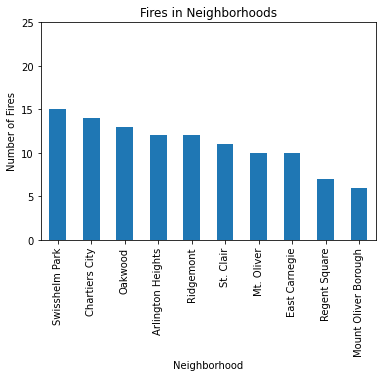

In [20]:
data = fire["neighborhood"].value_counts()
data.tail(10).plot(kind = "bar", ylim = [0, 25])
plt.title("Fires in Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Fires")
# This shows a graph with the 10 neighborhoods with the least amount of fires.

### Conclusion:

  While my data is not complete because the population of each neighborhood is not included in my dataset, I can assume from my analysis
that the "best" neighborhood in terms of fire occurrences is Mount Oliver Borough. With the data that was available from my dataset, Mount Oliver Borough is an accurate answer to the question as it had the least amount of fires compared to every other neighborhood in the Pittsburgh area. I reached this conclusion by finding the amount of fires in each neighborhood and comparing the fires' causes in the neighborhoods with the smallest amount. I also included the bar graph because, although the neighborhood names are not legible, the graph displays the overall difference in the amount of fires for all of the neighborhoods.

# Kevin's Work:

### Intro:

According to Amnesty.Org, m ore than 500 people die every day from gun violence, and 44% of all homicides globally involve gun violence. If were able to determine the number of firearms seized by each neighborhood, we can find potentially the safest one based on which one has the lowest number seized, since that can correlate to less potential gun violence.

### Dataset:

My Dataset: Firearm Seizures Data

Link: https://data.wprdc.org/dataset/pbp-fire-arm-seizures/resource/e967381d-d7e9-48e3-a2a2-39262f7fa5c4?view_id=4c4fa4d5-71cd-4aa7-92e8-18206b9140a0

The dataset I chosen discusses the number of firearms seized by the Pittsburgh Police on a monthly basis. This can vary from individuals who were suspected of criminal offense to firearms that were left unattended in public. I chose this dataset because I believe it can help determine how safe a neighborhood is because of how dangerous firearms are. According to Amnesty.Org, m ore than 500 people die every day from gun violence, and 44% of all homicides globally involve gun violence. We can use the numbers to determine which neighborhood is the safest in Pittsburgh by checking which have the least number of firearms seized as it can help show which neigborhoods own more firearms than others. I plan to abstract the code in order to see the seized firearms rate rates per neighborhood. This will allow to determine which neighborhoods are safer or more dangerous based on the number of seized firearms. I will also use the data to make a bar graph showing the number per neighborhood.

### Metric:

I will be looking for the neighborhoods with the lowest reported seized firearms.


### Code:

In [7]:
filename = "https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4"
df = pd.read_csv(filename)
# Here I am importing my dataset

In [8]:
print(df)
# Test to make sure all data is imported accurately 

                                             address  total_count  \
0      1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210            2   
1        BREVET WAY & MINTON ST PITTSBURGH, PA 15204            1   
2     TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213            1   
3         3500 BLOCK GERBER AVE PITTSBURGH, PA 15212            1   
4           7500 BLOCK KELLY ST PITTSBURGH, PA 15208            1   
...                                              ...          ...   
3953  7100 BLOCK FRANKSTOWN AVE PITTSBURGH, PA 15208            1   
3954     LINCOLN AVE & ROWAN ST PITTSBURGH, PA 15206            1   
3955    LINCOLN AVE & TENNIS ST PITTSBURGH, PA 15206            1   
3956       9TH ST & LIBERTY AVE PITTSBURGH, PA 15222            1   
3957      2000 BLOCK CENTRE AVE PITTSBURGH, PA 15219            1   

      other_count  pistol_count  revolver_count  rifle_count  shotgun_count  \
0               0             1               1            0              0   
1            

In [9]:
print(df['neighborhood'].unique().tolist())
# Prints a list of all unique neighborhoods

['Mount Oliver Borough', 'Sheraden', 'Terrace Village', 'Brighton Heights', nan, 'Westwood', 'East Liberty', 'Upper Lawrenceville', 'Marshall-Shadeland', 'Beechview', 'East Hills', 'Arlington', 'Arlington Heights', 'Mount Washington', 'South Side Flats', 'Hazelwood', 'Homewood South', 'Greenfield', 'Bloomfield', 'Beltzhoover', 'Homewood North', 'Upper Hill', 'Perry South', 'Lincoln-Lemington-Belmar', 'Bedford Dwellings', 'Homewood West', 'Carrick', 'Central Northside', 'Chateau', 'Fineview', 'Chartiers City', 'Larimer', 'Polish Hill', 'South Shore', 'Highland Park', 'Knoxville', 'Lower Lawrenceville', 'Allentown', 'Spring Hill-City View', 'Garfield', 'Bluff', 'Overbrook', 'South Side Slopes', 'Central Business District', 'Banksville', 'Perry North', 'Friendship', 'Crawford-Roberts', 'Middle Hill', 'Brookline', 'Point Breeze', 'Crafton Heights', 'Northview Heights', 'South Oakland', 'Point Breeze North', 'East Allegheny', 'Elliott', 'Fairywood', 'Shadyside', 'Allegheny West', 'Mancheste

In [10]:
neighborhood_total_df = df.groupby(['neighborhood']).sum()
print("Total Number of Neighborhoods: ", len(neighborhood_total_df))
# Groups addresses into neighborhoods

Total Number of Neighborhoods:  88


In [11]:
sorted_neighborhood_total_df = neighborhood_total_df.sort_values(by=['total_count'], ascending=False)
print(sorted_neighborhood_total_df)
# Sorts neighborhoods by total firearms seized

                  total_count  other_count  pistol_count  revolver_count  \
neighborhood                                                               
Homewood South            300            3           220              42   
South Side Flats          174            5           153              12   
Homewood North            146            1           110              19   
East Liberty              140            1            93              10   
Carrick                   133            4            88              15   
...                       ...          ...           ...             ...   
Swisshelm Park              3            0             1               1   
Summer Hill                 3            0             2               0   
Mt. Oliver                  3            0             1               1   
Oakwood                     3            0             1               1   
Regent Square               3            0             2               1   

           

In [12]:
safest_df = sorted_neighborhood_total_df.loc[sorted_neighborhood_total_df['total_count'] == 3]
print("Number of safest neighborhoods: ", len(safest_df))
# Here I determine the safest neighborhoods by printing the neighborhoods with the lowest amount of firearm seizures

Number of safest neighborhoods:  5


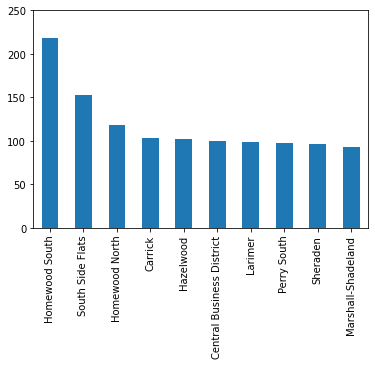

In [14]:
firearms = pd.read_csv('https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4')

data = firearms["neighborhood"].value_counts()
data.plot(kind = "bar", ylim = [0, 250])
data.head(10).plot(kind = "bar", ylim = [0, 250])
mpl.show()
# This bar graph displays the highest firearm seizure data for the neighborhoods in my dataset

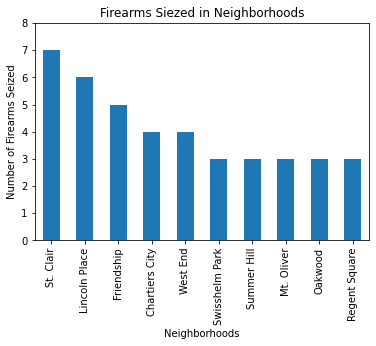

In [15]:
fig3 = mpl.figure(3)
sorted_neighborhood_total_df['total_count'].tail(10).plot(kind = "bar", ylim = [0, 8])
fig3.savefig('Lowest_Firearms_Seized.png')

# Show graph
mpl.title("Firearms Siezed in Neighborhoods")
mpl.xlabel("Neighborhoods")
mpl.ylabel("Number of Firearms Seized")
mpl.show()
# This bar graph displays the 10 neighborhoods with the lowest amount of firearm seizures.

### Conclusion:

Based on the data, Oliver Borough has the least number of firearms seized. I did not take into account the total population of each neighborhood as this information was not present in my dataset. 

# Overall Results:

Based on everyone's findings, we have decided that Mt. Oliver Neighborhood is the best neighborhood based on our safety-centric criteria. Mt. Oliver Neighborhood was the only neighborhood to score in the top five of each of our dataset analyses; it had the second lowest arrest rate based on population (332.8 per 100,000), tied for third for least number of fires (10), and tied for first place for least amount of firearms seized (3). Based on its ranking in our metrics, Mt. Oliver is one of the best neighborhoods in Pittsburgh, especially when taking overall safety into account.